In [74]:
import arrow
import netCDF4 as nc
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy

In [75]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [76]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [77]:

##load sea and air temperature

tdir = './For_TJ/'

seatemp_RCP45 = nc.Dataset(f'{tdir}NEP36-CanOE_temp_RCP45_2046-2065_monthly_SS.nc')
seatemp_hist = nc.Dataset(f'{tdir}NEP36-CanOE_temp_historical_1986-2005_monthly_SS.nc')

tas_RCP45 = nc.Dataset(f'{tdir}tas_CanRCM4-NAM22_daily_RCP45_2046-2065_107x107_SS.nc')
tas_hist = nc.Dataset(f'{tdir}tas_CanRCM4-NAM22_daily_1986-2005_107x107_SS.nc')


## Look at 1 day of historical and RCP4.5 air temperature data

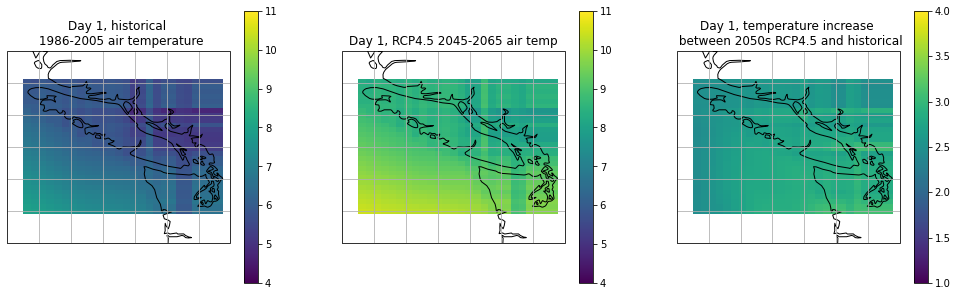

In [78]:
tvmin = 4
tvmax = 11
lat = tas_hist['lat'][:]
lon = tas_hist['lon'][:]-360
lon2d, lat2d = np.meshgrid(lon, lat)
data_hist = tas_hist['tas'][0,:]-273.15
data_RCP45 = tas_RCP45['tas'][0,:]-273.15

#### plot with diffs

central_lon, central_lat = -126, 49
extent = [-129, -122, 46, 52]

plt.figure(figsize=(17, 5))
ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())

ax1.set_extent(extent)
ax1.gridlines()
ax1.coastlines(resolution='50m')
w = ax1.pcolormesh(lon2d, lat2d, data_hist, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax1.set_title(f'Day 1, historical \n 1986-2005 air temperature')

ax2 = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon2d, lat2d, data_RCP45, vmin = tvmin, vmax = tvmax, transform=ccrs.PlateCarree())
plt.colorbar(w)
ax2.set_title(f'Day 1, RCP4.5 2045-2065 air temp')

ax2 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')
w = ax2.pcolormesh(lon2d, lat2d, data_RCP45-data_hist, vmin = 1, vmax = 4, transform=ccrs.PlateCarree())
ax2.set_title(f'Day 1, temperature increase \n between 2050s RCP4.5 and historical')
plt.colorbar(w)

## extract by-day means, std, maxs, mins for air temperature

In [95]:
#mean, std, max, min
hist_stats = np.zeros([365,4])
RCP45_stats = np.zeros([365,4])
delta_stats = np.zeros([365,4])
# data_hist = tas_hist['tas'][0,:]-273.15
# data_RCP45 = tas_RCP45['tas'][0,:]-273.15

for i in range(0,365):
    
    data_hist = tas_hist['tas'][i,:]-273.15
    data_RCP45 = tas_RCP45['tas'][i,:]-273.15
    data_delta = data_RCP45-data_hist
    
    hist_stats[i,0] = np.nanmean(data_hist); hist_stats[i,1] = np.nanstd(data_hist);
    hist_stats[i,2] = np.nanmax(data_hist); hist_stats[i,3] = np.nanmin(data_hist);
    RCP45_stats[i,0] = np.nanmean(data_RCP45); RCP45_stats[i,1] = np.nanstd(data_RCP45);
    RCP45_stats[i,2] = np.nanmax(data_RCP45); RCP45_stats[i,3] = np.nanmin(data_RCP45);
    delta_stats[i,0] = np.nanmean(data_delta); delta_stats[i,1] = np.nanstd(data_delta);
    delta_stats[i,2] = np.nanmax(data_delta); delta_stats[i,3] = np.nanmin(data_delta);

    
    

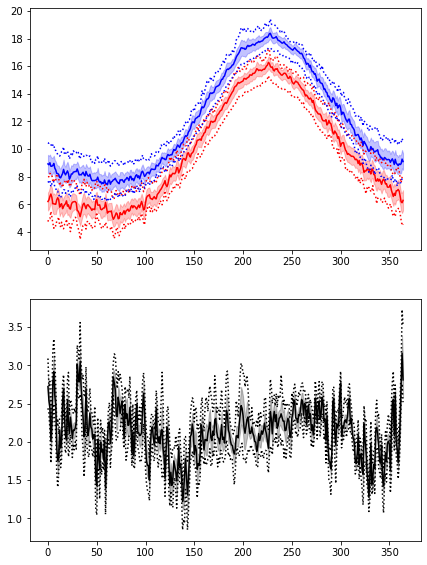

In [96]:
fact = 0.7
fig, axs = plt.subplots(2,1, figsize=(10*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

daze = np.arange(0,365,1)
axs[0].plot(daze,hist_stats[:,0], 'r-', label = 'hist')
axs[0].plot(daze,hist_stats[:,3], 'r:' )
axs[0].plot(daze,hist_stats[:,2], 'r:' )
axs[0].fill_between(daze,hist_stats[:,0]+hist_stats[:,1],\
                    hist_stats[:,0]-hist_stats[:,1], color = 'r', alpha = 0.24 )

axs[0].plot(daze,RCP45_stats[:,0], 'b-', label = 'RCP45')
axs[0].plot(daze,RCP45_stats[:,3], 'b:' )
axs[0].plot(daze,RCP45_stats[:,2], 'b:' )
axs[0].fill_between(daze,RCP45_stats[:,0]+RCP45_stats[:,1],\
                    RCP45_stats[:,0]-RCP45_stats[:,1], color = 'b', alpha = 0.24 )

axs[1].plot(daze,delta_stats[:,0], 'k-', label = 'delta')
axs[1].plot(daze,delta_stats[:,3], 'k:' )
axs[1].plot(daze,delta_stats[:,2], 'k:' )
axs[1].fill_between(daze,delta_stats[:,0]+delta_stats[:,1],\
                    delta_stats[:,0]-delta_stats[:,1], color = 'k', alpha = 0.24 )